<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Text(0.5, 1.0, 'Distribution curve of ConvertedComp column')

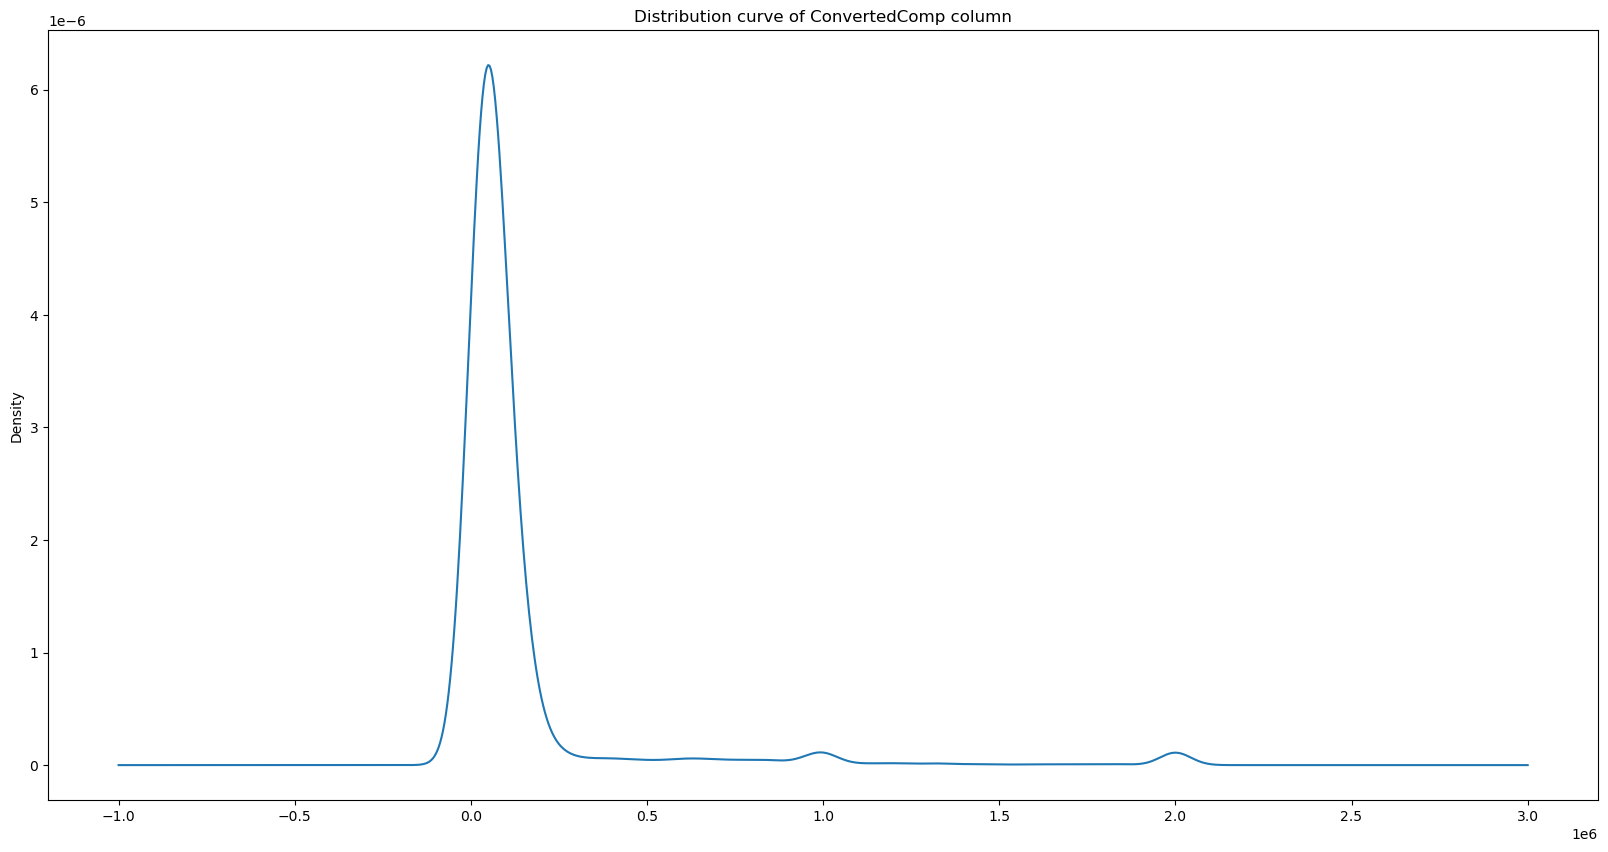

In [3]:
# your code goes here
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

df['ConvertedComp'].value_counts()

df['ConvertedComp'].sort_values()

x = df['ConvertedComp'].median()

x

df['ConvertedComp'].isnull().sum()

df['ConvertedComp'].replace('?',np.nan,inplace=True)

df['ConvertedComp'].replace(np.nan,x,inplace=True)

df['ConvertedComp'].isnull().sum()


df['ConvertedComp'].plot(kind='kde',figsize=(20,10),stacked=False,y=df['ConvertedComp'])
plt.title("Distribution curve of ConvertedComp column")

Plot the histogram for the column `ConvertedComp`.


[10475   238   115   125    99   131    34    15    15   151]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


<AxesSubplot:ylabel='Frequency'>

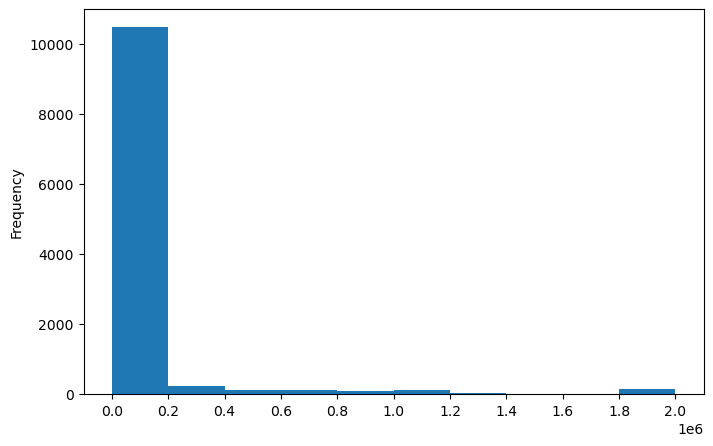

In [5]:
# your code goes here
count,bin_edges = np.histogram(df['ConvertedComp'])

print(count)

print(bin_edges)

df['ConvertedComp'].plot(kind='hist',xticks=bin_edges,figsize=(8,5))

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
w =df[df['Gender'] == 'Woman']
w.sort_values(by='ConvertedComp')

w['ConvertedComp'].sort_values()
w['ConvertedComp'].median()


57745.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


[2094 5624 2557  842  225   49    6    0    0    1] [16.  24.3 32.6 40.9 49.2 57.5 65.8 74.1 82.4 90.7 99. ]


<AxesSubplot:ylabel='Frequency'>

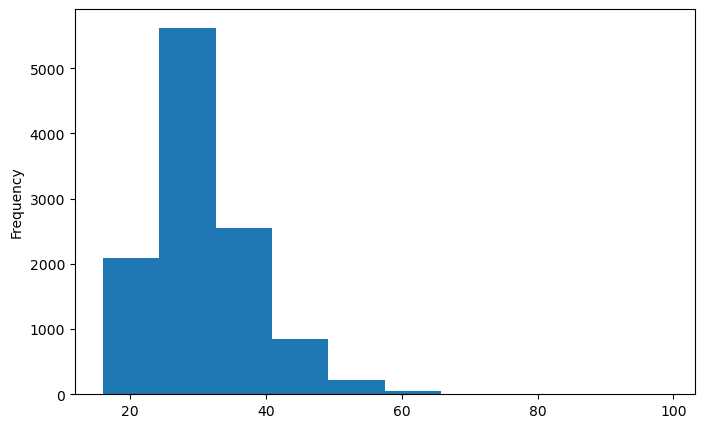

In [10]:
# your code goes here
a = df['Age'].median()

df['Age'].replace(np.nan,a,inplace=True)

df['Age'].isnull().sum()

count,bin_edges=np.histogram(df['Age'])

print(count,bin_edges)

df['Age'].plot(kind='hist',figsize=(8,5))

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

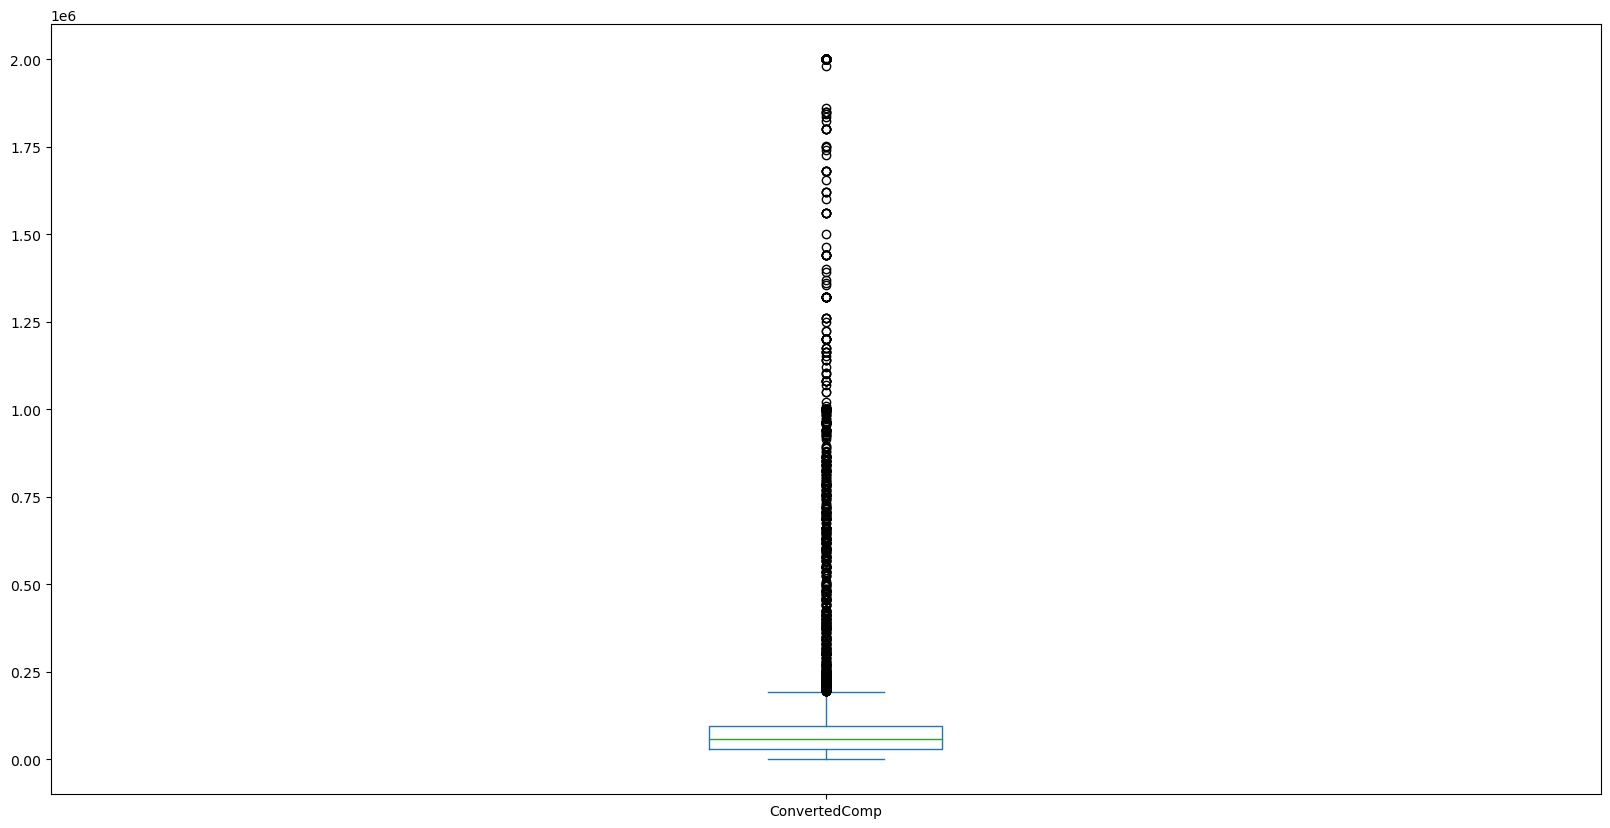

In [11]:
# your code goes here

df['ConvertedComp'].plot(kind='box',figsize=(20,10))


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here

data = df['ConvertedComp']

Q1 = np.percentile(data,25,interpolation='midpoint')

Q3 = np.percentile(data,75,interpolation='midpoint')

IQR = Q3 -Q1

IQR


65980.0

Find out the upper and lower bounds.


In [13]:
# your code goes here

Lower_bound = Q1 - (1.5 * IQR)

Upper_bound = Q3 + (1.5 * IQR)

print("Lower_Bound: " , Lower_bound)

print("Upper_Bound: " , Upper_bound)

Lower_Bound:  -69950.0
Upper_Bound:  193970.0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
# your code goes here

( df['ConvertedComp'] > IQR ).value_counts()

False    6766
True     4632
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
# your code goes here


ConvertedComp_New = df[df['ConvertedComp']< IQR ] 

ConvertedComp_New

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
6,20,"I am not primarily a developer, but I write co...",No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Lithuania,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",...,Not applicable - I did not use Stack Overflow ...,Tech articles written by other developers,38.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
9,24,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Israel,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,23.0,Man,No,Straight / Heterosexual,Middle Eastern,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11389,25125,I am a developer by profession,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Italy,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
11390,25128,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,"Yes, part-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,26.0,Man,No,Straight / Heterosexual,South Asian,Yes,Appropriate in length,Easy
11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,N

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [35]:
# your code goes her

d = df.select_dtypes(include='number')



## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
